<a href="https://colab.research.google.com/github/WHU-Peter/COMP6247-Reinforcement-and-Online-Learning/blob/main/Assignment1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

seed = 7
np.random.seed(seed)

Text(0.5, 1.0, 'Time Varying Autoregressive Process')

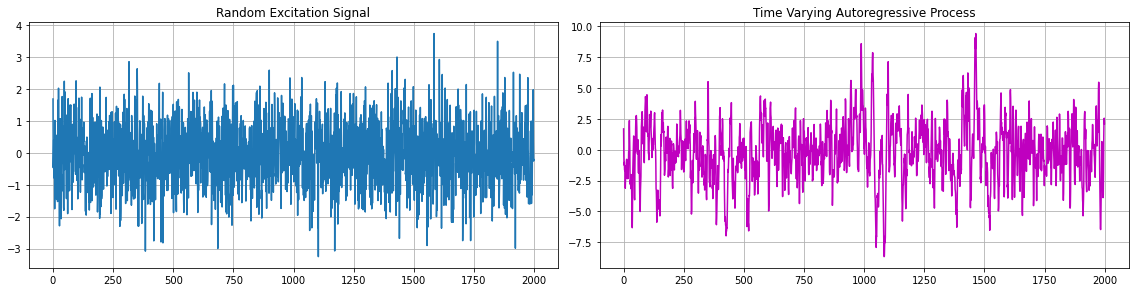

In [2]:
N = 2000
ex = np.random.randn(N)
cycle = 500
a = np.array([1.2, -0.4])
A = np.zeros((N,2))
alpha = 0.1
sample_num = 100
for n in range(N):
    A[n,0] = a[0] + alpha * np.cos(2*np.pi*n/cycle)
    A[n,1] = a[1] + alpha * np.sin(np.pi*n/cycle)
    
S_time_varing = ex.copy();
for n in range(2, N):
    x = np.array([S_time_varing[n-1], S_time_varing[n-2]])
    S_time_varing[n] = np.dot(x, A[n,:]) + ex[n]
    
y_time_varing = S_time_varing.copy()
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
plt.tight_layout()
ax[0].plot(range(N), ex)
ax[0].grid(True)
ax[0].set_title("Random Excitation Signal")
ax[1].plot(range(N), S_time_varing, color='m')
ax[1].grid(True)
ax[1].set_title("Time Varying Autoregressive Process")

In [3]:
def neff(weights):
    return 1. / np.sum(np.square(weights))

def SIS(y, beta, R):    
    th_conv = np.zeros([2, N])
    th_conv[0,0:2] = np.random.randn(2)
    th_conv[1,0:2] = np.random.randn(2)
    
    ESS = np.zeros(N)
    ESS[0] = sample_num
    ESS[1] = sample_num
    th_sample = np.random.randn(sample_num,2)
    w = np.ones((sample_num,1))
    for t in range(2, N):
        x = np.zeros((2,1))
        x[0] = y[t-1]
        x[1] = y[t-2]
        
        for i in range(sample_num):
            th_sample[i] = th_sample[i] + beta* np.random.randn(1,2)
            w[i] = stats.norm(loc=th_sample[i] @ x, scale=R).pdf(y[t])*w[i]
        w += 1.e-300
        w = w/(np.sum(w))
        ESS[t] = neff(w)
        
        th_conv_t = (th_sample.T @ w)
        th_conv[0,t] = th_conv_t[0]
        th_conv[1,t] = th_conv_t[1]
    return th_conv, ESS

R = 0.988, beta = 0.01000
9.148269334140545
13.350304324609105
[100.         100.          53.77488687 ...   1.           1.
   1.        ]


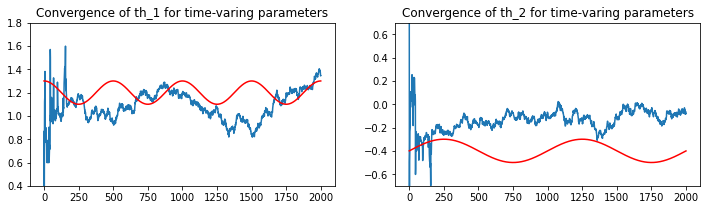

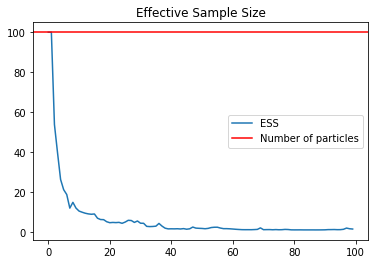

In [10]:
beta = 0.01
R = np.std(ex)
print("R = %4.3f, beta = %6.5f" %(R, beta))
th_conv, ESS = SIS(y_time_varing, beta, R)

print(np.linalg.norm(th_conv[0]-A[:,0]))
print(np.linalg.norm(th_conv[1]-A[:,1]))
print(ESS)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
ax[0].plot(th_conv[0])
ax[0].plot(A[:,0], color='r')
ax[0].set_ylim(0.4, 1.8)
ax[0].set_title("Convergence of th_1 for time-varing parameters" )
ax[1].plot(th_conv[1])
ax[1].plot(A[:,1], color='r')
ax[1].set_ylim(-0.7, 0.7)
ax[1].set_title("Convergence of th_2 for time-varing parameters")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
ax.plot(ESS[0:100], label='ESS')
ax.axhline(y=sample_num, color='r', label="Number of particles")
# ax[0].set_ylim(0.4, 1.8)
ax.set_title("Effective Sample Size")
ax.legend()
# ax[1].plot(th_conv[1])
# ax[1].plot(A[:,1], color='r')
# ax[1].set_ylim(-0.7, 0.7)
# ax[1].set_title("Convergence of th_2 for time-varing parameters")

In [5]:
def neff(weights):
    return 1. / np.sum(np.square(weights))

def PF(y, beta, R):    
    th_conv = np.zeros([2, N])
    th_conv[0,0:2] = np.random.randn(2)
    th_conv[1,0:2] = np.random.randn(2)
    
    ESS = np.zeros(N)
    ESS[0] = sample_num
    ESS[1] = sample_num
    th_sample = np.random.randn(sample_num,2)
    w = np.ones((sample_num,1))
    for t in range(2, N):
        x = np.zeros((2,1))
        x[0] = y[t-1]
        x[1] = y[t-2]
        
        for i in range(sample_num):
            th_sample[i] = th_sample[i] + beta*np.random.randn(1,2)
            w[i] = stats.norm(loc=th_sample[i] @ x, scale=R).pdf(y[t])*w[i]
        w += 1.e-300
        w = w/(np.sum(w))
        ESS[t] = neff(w)
        
        if ESS[t] < sample_num:
            w_resample = np.cumsum(w)
            w_resample[-1] = 1.  # avoid round-off error
            indexes = np.searchsorted(w_resample, np.random.rand(sample_num))
            # resample according to indexes
            th_sample = th_sample[indexes]
            w.fill(1.0 / sample_num)
        
        th_conv_t = (th_sample.T @ w)
        th_conv[0,t] = th_conv_t[0]
        th_conv[1,t] = th_conv_t[1]
    
    return th_conv, ESS

R = 0.988, beta = 0.01000
6.521336050329467
5.489947069345883


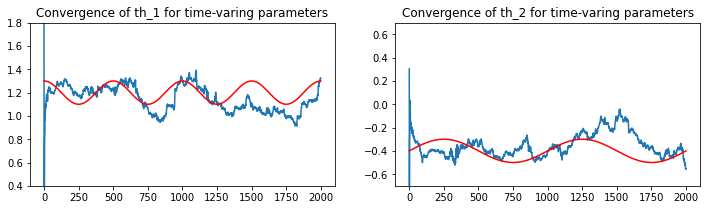

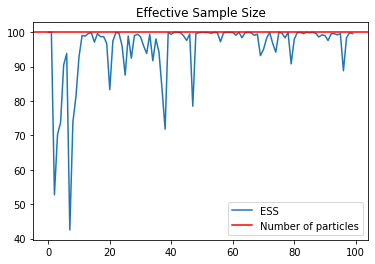

In [12]:
beta = 0.01
R = np.std(ex)
print("R = %4.3f, beta = %6.5f" %(R, beta))
th_conv, ESS = PF(y_time_varing, beta, R)

print(np.linalg.norm(th_conv[0]-A[:,0]))
print(np.linalg.norm(th_conv[1]-A[:,1]))
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
ax[0].plot(th_conv[0])
ax[0].plot(A[:,0], color='r')
ax[0].set_ylim(0.4, 1.8)
ax[0].set_title("Convergence of th_1 for time-varing parameters" )
ax[1].plot(th_conv[1])
ax[1].plot(A[:,1], color='r')
ax[1].set_ylim(-0.7, 0.7)
ax[1].set_title("Convergence of th_2 for time-varing parameters")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
ax.plot(ESS[0:100], label='ESS')
ax.axhline(y=sample_num, color='r', label="Number of particles")
# ax[0].set_ylim(0.4, 1.8)
ax.set_title("Effective Sample Size")
ax.legend()

In [7]:
def kalmanFilter(y, Q, R, th_n1_n1, P_n1_n1):
    x = np.zeros((2,1))
    k = np.zeros((N,2))

    th_conv = np.zeros([2, N])
    th_conv[0,0] = th_n1_n1[0]
    th_conv[0,1] = th_n1_n1[1]
    th_conv[1,0] = th_n1_n1[0]
    th_conv[1,1] = th_n1_n1[1]

    for n in range(2, N):
        # Input vector contains past velues
        x[0] = y[n-1]
        x[1] = y[n-2]
        # Prediction of state and covariance
        th_n_n1 = th_n1_n1.copy()
        P_n_n1 = P_n1_n1 + Q
        yh = th_n_n1.T @ x
        en = y[n] - yh
#         ePlot[n] = en
        # Kalman gain (kn) and innovation variance (den)
        den = x.T @ P_n_n1 @ x + R
        kn = P_n_n1 @ x @ np.linalg.inv(den)
        k[n] = np.array([kn[0], kn[1]]).T
        # Posterior update
        th_n_n = th_n_n1 + kn * en
        P_n_n = (np.eye(2) - kn @ x.T) @ P_n_n1
        # Save
        th_conv[0,n] = th_n_n[0]
        th_conv[1,n] = th_n_n[1]
        # Remember for next step
        th_n1_n1 = th_n_n.copy()
        P_n1_n1 = P_n_n.copy()
        
    return th_conv, k

R = 0.977, Q = 0.00100 I


Text(0.5, 1.0, 'Convergence of th_2 for time varing parameters')

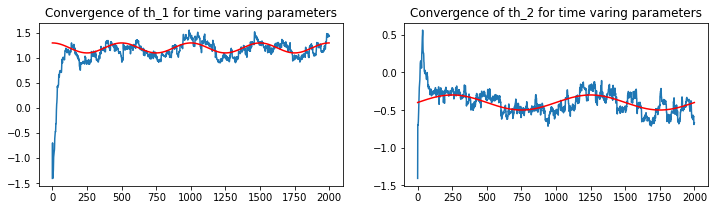

In [8]:
th_n1_n1 = np.random.randn(2,1)
P_n1_n1 = 0.001*np.eye(2)
beta = 0.001
Q = beta*np.eye(2)
R = np.var(ex[0:N])
print("R = %4.3f, Q = %6.5f I" %(R, beta))
th_conv_time_varing, k_time_varing = kalmanFilter(y_time_varing, Q, R, th_n1_n1, P_n1_n1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
ax[0].plot(th_conv_time_varing[0])
# ax[1,0].set_xlim(0,1.1*N)
ax[0].plot(A[:,0], color='r')
ax[0].set_title("Convergence of th_1 for time varing parameters")
ax[1].plot(th_conv_time_varing[1])
# ax[1,1].set_xlim(0,1.1*N)
ax[1].plot(A[:,1], color='r')
ax[1].set_title("Convergence of th_2 for time varing parameters")